In [68]:
import pandas as pd
import numpy as np
from nbformat.sign import algorithms

data_girl = pd.read_csv('data_girl.csv',encoding='gbk')
missing_values_count = data_girl.isnull().sum()
print(missing_values_count)

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Unnamed: 21,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康
0,1,B001,32,162.0,82.0,2023/8/6,自然受孕,20231119,1,13w+5,...,NaN,-0.016976,0.379614,0.392832,0.402970,0.024708,NaN,1,0,是
1,2,B001,32,162.0,82.0,2023/8/6,自然受孕,20231208,2,17w+1,...,NaN,-0.024409,0.377950,0.391176,0.399509,0.025608,NaN,1,0,是
2,3,B001,32,162.0,85.0,2023/8/6,自然受孕,20240101,3,19w+6,...,NaN,-0.016357,0.385021,0.397515,0.408611,0.024452,NaN,1,0,是
3,4,B001,32,162.0,86.0,2023/8/6,自然受孕,20240123,4,23w,...,NaN,-0.021307,0.376070,0.389126,0.397539,0.022412,NaN,1,0,是
4,5,B002,33,165.0,96.0,2023/2/15,自然受孕,20230519,1,12w+5,...,NaN,-0.000886,0.378697,0.391196,0.401632,0.022843,NaN,1,0,是
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,601,B146,34,164.0,90.0,2022/12/31,自然受孕,20230615,4,23w+1,...,NaN,-0.014243,0.381691,0.393509,0.402032,0.019539,T18,≥3,1,是
601,602,B147,32,166.0,86.0,2023/1/8,自然受孕,20230423,1,15w,...,NaN,-0.000855,0.382151,0.395193,0.406132,0.022342,NaN,≥3,1,是
602,603,B147,32,166.0,84.0,2023/1/8,自然受孕,20230513,2,15w+4,...,NaN,-0.006456,0.378540,0.391420,0.400972,0.027777,NaN,≥3,1,是
603,604,B147,32,166.0,86.0,2023/1/8,自然受孕,20230610,3,19w+4,...,NaN,-0.013719,0.379481,0.391826,0.401168,0.022127,NaN,≥3,1,是


In [51]:
data_girl['胎儿是否健康'].replace({'是': 1, '否': 0}, inplace=True)
data_girl['IVF妊娠'].replace({'自然受孕': 1, 'IUI（人工授精）':2, 'IVF（试管婴儿）' : 3}, inplace=True)
data_girl['怀孕次数'].replace({'≥3':3}, inplace=True) # 大于等于3为3
data_girl['检测孕周_周数'] = data_girl['检测孕周'].apply(
    lambda x: float(str(x).lower().split('w')[0]) +  # 提取整数周部分
    (float(str(x).lower().split('w')[1].replace('+', '')) / 7  # 将额外天数转换为周的小数部分
     if len(str(x).lower().split('w')) > 1 and str(x).lower().split('w')[1] else 0)
)
data_girl.to_csv('data_girl_clean_all.csv', index=False, encoding='gbk')
data_girl.head()

C:\Users\33703\AppData\Local\Temp\ipykernel_19688\4138686633.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_girl['胎儿是否健康'].replace({'是': 1, '否': 0}, inplace=True)
C:\Users\33703\AppData\Local\Temp\ipykernel_19688\4138686633.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_girl['胎儿是

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康,检测孕周_周数
0,1,B001,32,162.0,82.0,2023/8/6,1,20231119,1,13w+5,...,-0.016976,0.379614,0.392832,0.402970,0.024708,NaN,1,0,1,13.714286
1,2,B001,32,162.0,82.0,2023/8/6,1,20231208,2,17w+1,...,-0.024409,0.377950,0.391176,0.399509,0.025608,NaN,1,0,1,17.142857
2,3,B001,32,162.0,85.0,2023/8/6,1,20240101,3,19w+6,...,-0.016357,0.385021,0.397515,0.408611,0.024452,NaN,1,0,1,19.857143
3,4,B001,32,162.0,86.0,2023/8/6,1,20240123,4,23w,...,-0.021307,0.376070,0.389126,0.397539,0.022412,NaN,1,0,1,23.000000
4,5,B002,33,165.0,96.0,2023/2/15,1,20230519,1,12w+5,...,-0.000886,0.378697,0.391196,0.401632,0.022843,NaN,1,0,1,12.714286


In [85]:
data_girl['染色体的非整倍体']
data_girl['标签'] = np.where(data_girl['染色体的非整倍体'].isna(), 0, 1)
data_girl


In [53]:
train = data_girl[['13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值', 'X染色体的Z值', 'X染色体浓度', 'GC含量', '原始读段数', '孕妇BMI','标签']]
train['孕妇BMI'].fillna(train['孕妇BMI'].median(), inplace=True)
test = train.drop(columns=['标签'])
train.isnull().sum()

C:\Users\33703\AppData\Local\Temp\ipykernel_19688\3954511232.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['孕妇BMI'].fillna(train['孕妇BMI'].median(), inplace=True)
C:\Users\33703\AppData\Local\Temp\ipykernel_19688\3954511232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['孕妇BMI'].fillna(train['孕妇BMI'].median(), inplace=Tru

13号染色体的Z值    0
18号染色体的Z值    0
21号染色体的Z值    0
X染色体的Z值      0
X染色体浓度       0
GC含量         0
原始读段数        0
孕妇BMI        0
标签           0
dtype: int64

In [54]:
test.to_csv('test.csv', index=False, encoding='gbk')
train.to_csv('train.csv', index=False, encoding='gbk')

Epoch 1/50
16/16 [==============================] - 1s 13ms/step - loss: 0.6351 - accuracy: 0.7459 - val_loss: 0.4907 - val_accuracy: 0.8926
Epoch 2/50
16/16 [==============================] - 0s 10ms/step - loss: 0.4507 - accuracy: 0.8884 - val_loss: 0.3542 - val_accuracy: 0.8926
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.3956 - accuracy: 0.8884 - val_loss: 0.3341 - val_accuracy: 0.8926
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.3804 - accuracy: 0.8884 - val_loss: 0.3234 - val_accuracy: 0.8926
Epoch 5/50
16/16 [==============================] - 0s 12ms/step - loss: 0.3865 - accuracy: 0.8884 - val_loss: 0.3160 - val_accuracy: 0.8926
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.3528 - accuracy: 0.8884 - val_loss: 0.3049 - val_accuracy: 0.8926
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.3512 - accuracy: 0.8884 - val_loss: 0.2998 - val_accuracy: 0.8926
Epoch 8/50
16/16 

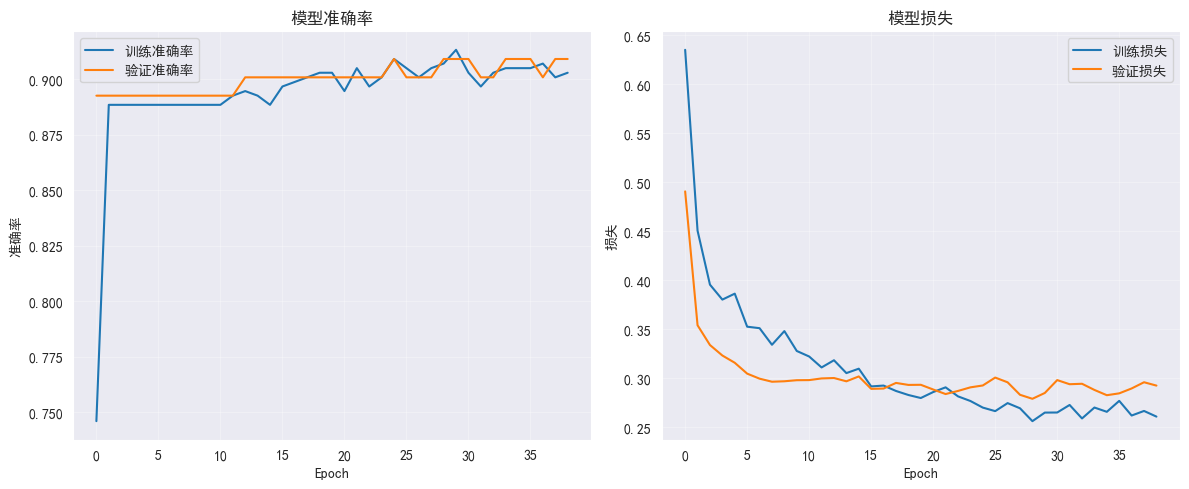

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
4/4 [==============================] - 0s 1ms/step


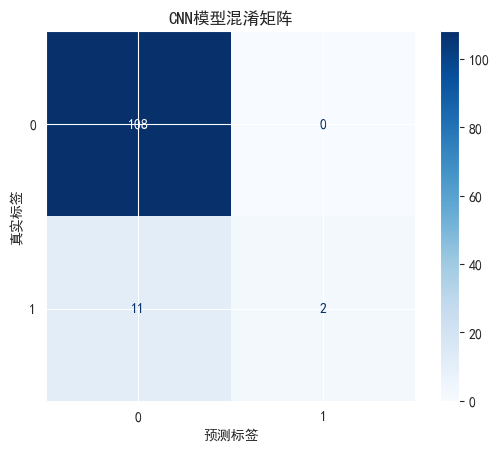

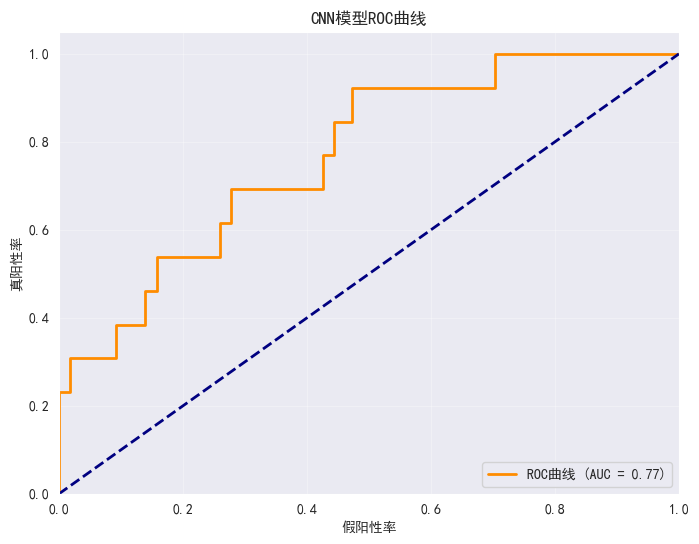

所有图表和数据已保存至当前目录中！


In [65]:
"""CNN"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os  # 添加os模块用于创建目录
from matplotlib.colors import LinearSegmentedColormap
# 定义颜色过渡：红 -> 白 -> 绿
colors = ['red', 'white', 'green']
my_cmap = LinearSegmentedColormap.from_list('my_cmap', colors)

# 创建plots目录如果不存在
if not os.path.exists('plots'):
    os.makedirs('plots')

# 读取数据（假设文件名为train.csv）
df = pd.read_csv('train.csv', encoding='gbk')

# 定义特征列名（根据数据描述）
feature_columns = [
    '13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值',
    'X染色体的Z值', 'X染色体浓度', 'GC含量', '原始读段数', '孕妇BMI'
]
target_column = '标签'

# 数据预处理
X = df[feature_columns].values
y = df[target_column].values

# 标准化特征
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 将数据重塑为3D张量 [样本数, 时间步长, 通道数]
X = X.reshape(X.shape[0], X.shape[1], 1)

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 构建CNN模型
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # 二分类输出

# 编译模型
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 设置早停回调
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# 训练模型
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

# 评估模型
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"\n验证集准确率: {val_acc:.4f}, 验证集损失: {val_loss:.4f}")

# 绘制训练历史曲线
plt.figure(figsize=(12, 5))

# 绘制准确率曲线
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.title('模型准确率')
plt.xlabel('Epoch')
plt.ylabel('准确率')
plt.legend()
plt.grid(True, alpha=0.3)

# 绘制损失曲线
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.title('模型损失')
plt.xlabel('Epoch')
plt.ylabel('损失')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('solve_4_cnn_训练历史.png', dpi=600, bbox_inches='tight')
plt.show()

# 保存模型结构图
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='solve_4_cnn_模型结构.png',
           show_shapes=True, show_layer_names=True, dpi=600)

# 绘制混淆矩阵（需要先进行预测）
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_proba = model.predict(X_val)
y_pred = (y_pred_proba > 0.5).astype("int32")

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('CNN模型混淆矩阵')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.savefig('solve_4_cnn_混淆矩阵.png', dpi=600, bbox_inches='tight')
plt.show()

# 绘制ROC曲线
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC曲线 (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假阳性率')
plt.ylabel('真阳性率')
plt.title('CNN模型ROC曲线')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.savefig('solve_4_cnn_ROC曲线.png', dpi=600, bbox_inches='tight')
plt.show()

print("所有图表和数据已保存至当前目录中！")

缺失值统计:
 13号染色体的Z值    0
18号染色体的Z值    0
21号染色体的Z值    0
X染色体的Z值      0
X染色体浓度       0
GC含量         0
原始读段数        0
孕妇BMI        0
标签           0
dtype: int64

数据集形状: (605, 9)


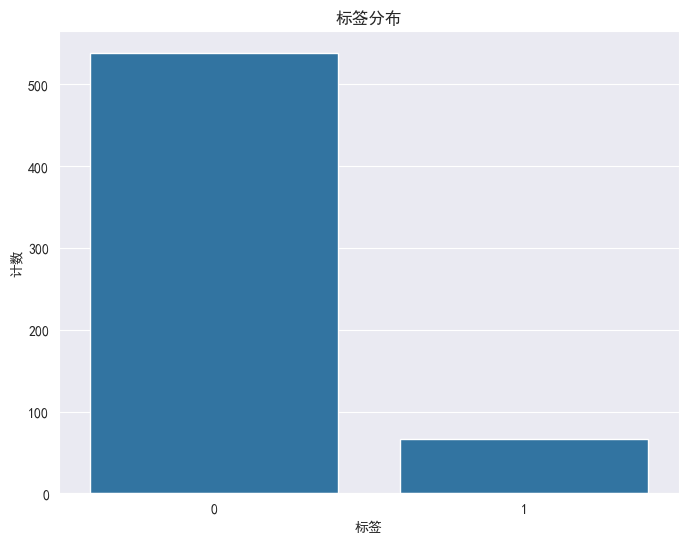

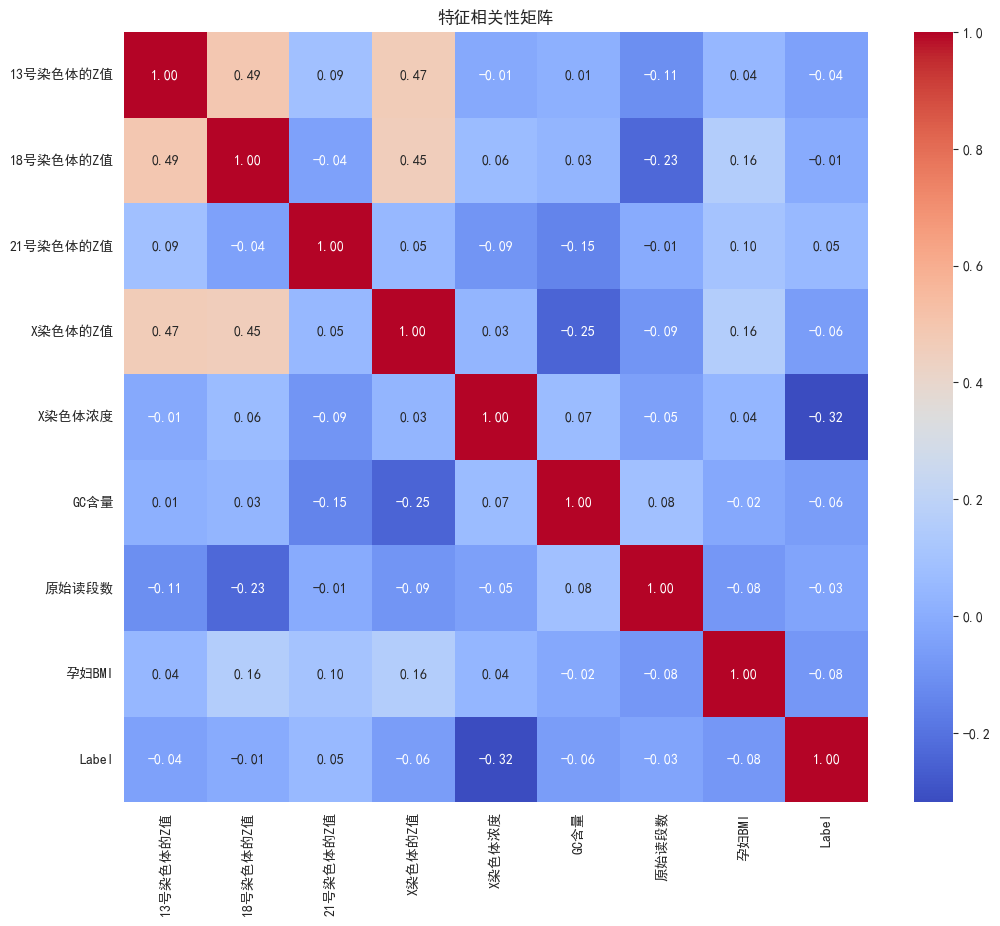


评估指标:
准确率: 0.9008
精确率: 0.6667
召回率: 0.1538
F1分数: 0.2500
AUC分数: 0.7635

分类报告:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       108
           1       0.67      0.15      0.25        13

    accuracy                           0.90       121
   macro avg       0.79      0.57      0.60       121
weighted avg       0.88      0.90      0.87       121



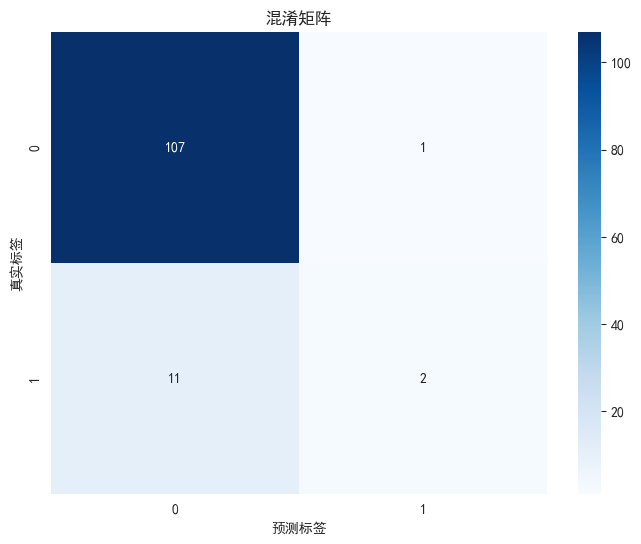

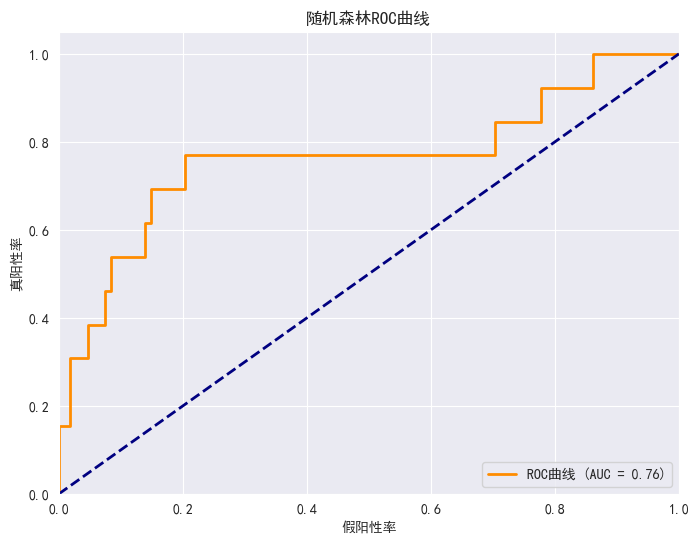

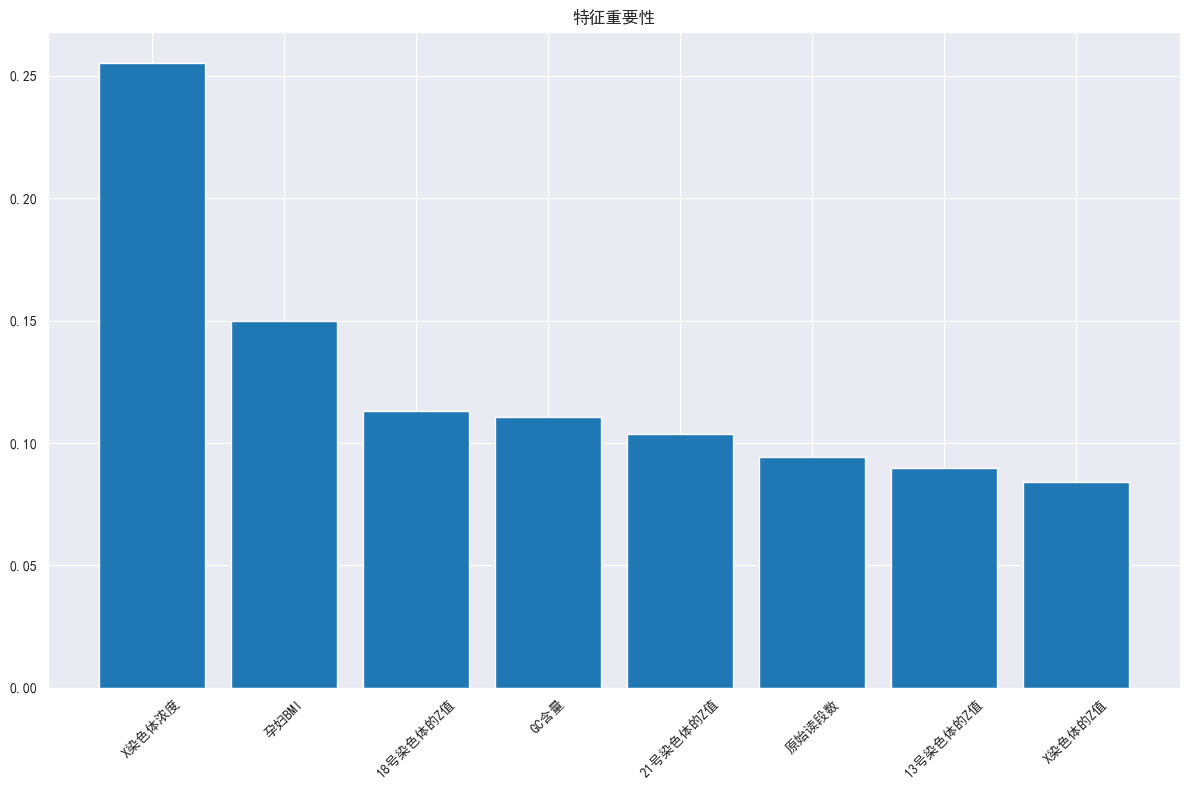


特征重要性排序:
X染色体浓度: 0.2550
孕妇BMI: 0.1499
18号染色体的Z值: 0.1129
GC含量: 0.1107
21号染色体的Z值: 0.1036
原始读段数: 0.0942
13号染色体的Z值: 0.0897
X染色体的Z值: 0.0839
最佳参数: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
最佳分数: 0.35676767676767673
所有图表已保存至当前目录中！


In [56]:
"""Random Forest"""
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os  # 添加os库用于路径操作

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 1. 数据加载和预处理
def load_and_preprocess_data(filename='train.csv'):
    # 读取CSV数据
    df = pd.read_csv(filename, encoding='gbk')

    # 检查缺失值
    print("缺失值统计:\n", df.isnull().sum())
    print(f"\n数据集形状: {df.shape}")

    # 分离特征和标签
    X = df.iloc[:, :-1]  # 所有列的最后前8列是特征
    y = df.iloc[:, -1]   # 最后一列是标签

    # 特征标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler, X.columns.tolist()

# 2. 数据分析与可视化
def explore_data(X, y, feature_names):


    # 类别分布可视化
    plt.figure(figsize=(8, 6))
    class_counts = pd.Series(y).value_counts()
    sns.barplot(x=class_counts.index, y=class_counts.values)
    plt.title('标签分布')
    plt.xlabel('标签')
    plt.ylabel('计数')
    plt.savefig('solve_4_random_forest_标签分布.png', dpi=600, bbox_inches='tight')  # 保存图表
    plt.show()

    # 特征相关性矩阵
    feature_df = pd.DataFrame(X, columns=feature_names)
    feature_df['Label'] = y
    plt.figure(figsize=(12, 10))
    sns.heatmap(feature_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('特征相关性矩阵')
    plt.savefig('solve_4_random_forest_特征相关性矩阵.png', dpi=600, bbox_inches='tight')  # 保存图表
    plt.show()

    return feature_df

# 3. 模型训练
def train_random_forest(X_train, y_train):
    # 创建随机森林分类器
    rf = RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        max_depth=8,
        min_samples_split=5,
        class_weight='balanced'
    )

    # 训练模型
    rf.fit(X_train, y_train)

    return rf

# 4. 模型评估
def evaluate_model(model, X_test, y_test):
    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # 计算评估指标
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print("\n评估指标:")
    print(f"准确率: {acc:.4f}")
    print(f"精确率: {prec:.4f}")
    print(f"召回率: {rec:.4f}")
    print(f"F1分数: {f1:.4f}")
    print(f"AUC分数: {roc_auc:.4f}")
    print("\n分类报告:\n", classification_report(y_test, y_pred))

    # 混淆矩阵可视化
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('混淆矩阵')
    plt.xlabel('预测标签')
    plt.ylabel('真实标签')
    plt.savefig('solve_4_random_forest_混淆矩阵.png', dpi=600, bbox_inches='tight')  # 保存图表
    plt.show()

    # ROC曲线
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC曲线 (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('假阳性率')
    plt.ylabel('真阳性率')
    plt.title('随机森林ROC曲线')
    plt.legend(loc="lower right")
    plt.savefig('solve_4_random_forest_ROC曲线.png', dpi=600, bbox_inches='tight')  # 保存图表
    plt.show()

    return y_pred, y_pred_proba

# 5. 特征重要性分析
def plot_feature_importance(model, feature_names):
    # 获取特征重要性
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # 创建图表
    plt.figure(figsize=(12, 8))
    plt.title("特征重要性")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
    plt.tight_layout()
    plt.savefig('solve_4_random_forest_特征重要性.png', dpi=600, bbox_inches='tight')  # 保存图表
    plt.show()

    # 打印重要性值
    print("\n特征重要性排序:")
    for i in indices:
        print(f"{feature_names[i]}: {importances[i]:.4f}")

# 6. 模型参数调优
def tune_random_forest(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 8, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf = RandomForestClassifier(random_state=42, class_weight='balanced')
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                               cv=5, n_jobs=-1, scoring='f1')
    grid_search.fit(X_train, y_train)

    print("最佳参数:", grid_search.best_params_)
    print("最佳分数:", grid_search.best_score_)

    return grid_search.best_estimator_


# 主流程
if __name__ == "__main__":
    # 1. 数据加载与预处理
    X, y, scaler, feature_names = load_and_preprocess_data()

    # 2. 数据探索
    feature_df = explore_data(X, y, feature_names)

    # 3. 划分训练测试集
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 4. 训练模型
    rf_model = train_random_forest(X_train, y_train)

    # 5. 评估模型
    y_pred, y_pred_proba = evaluate_model(rf_model, X_test, y_test)

    # 6. 特征重要性分析
    plot_feature_importance(rf_model, feature_names)

    # 7. 参数调优（可选）
    tuned_model = tune_random_forest(X_train, y_train)

    print("所有图表已保存至当前目录中！")

正在加载和预处理数据...
缺失值统计:
 13号染色体的Z值    0
18号染色体的Z值    0
21号染色体的Z值    0
X染色体的Z值      0
X染色体浓度       0
GC含量         0
原始读段数        0
孕妇BMI        0
标签           0
dtype: int64

数据集形状: (605, 9)
正在进行数据探索...


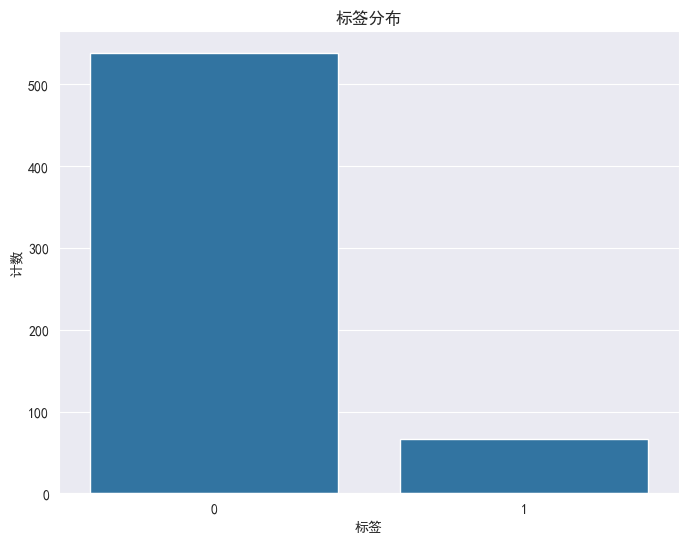

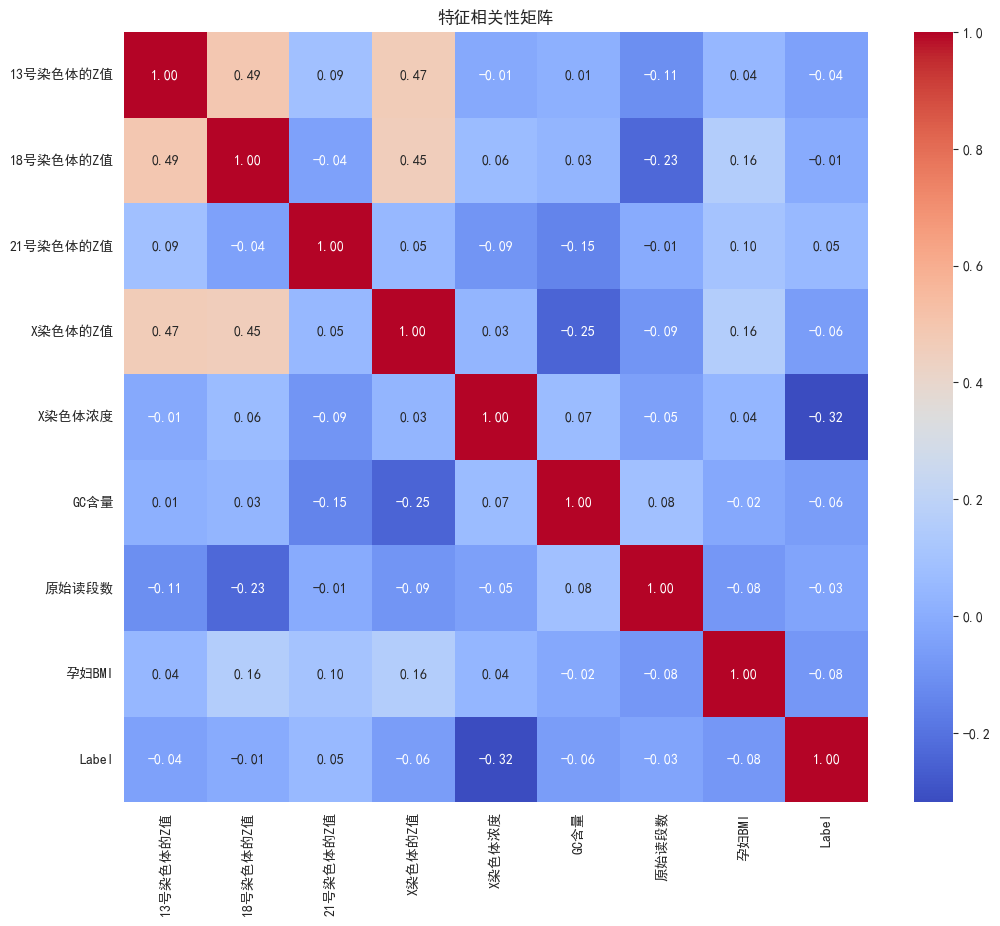

划分训练集和测试集...
训练AdaBoost模型...
评估模型性能...

评估指标:
准确率: 0.9008
精确率: 1.0000
召回率: 0.0769
F1分数: 0.1429
AUC分数: 0.8675

分类报告:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       108
           1       1.00      0.08      0.14        13

    accuracy                           0.90       121
   macro avg       0.95      0.54      0.55       121
weighted avg       0.91      0.90      0.86       121



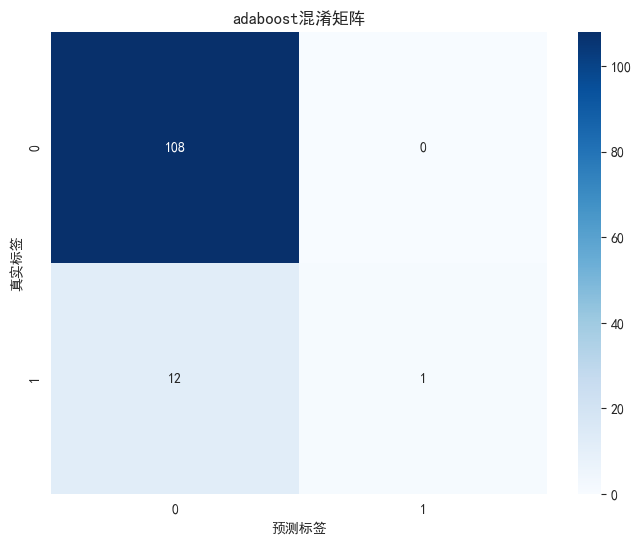

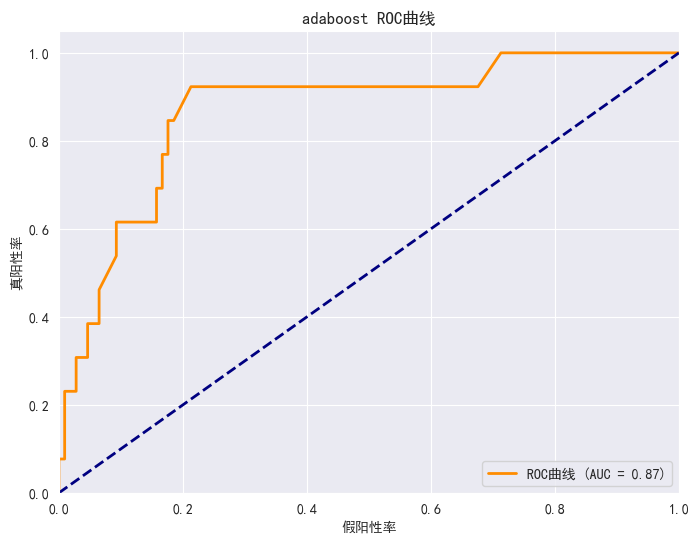

分析特征重要性...


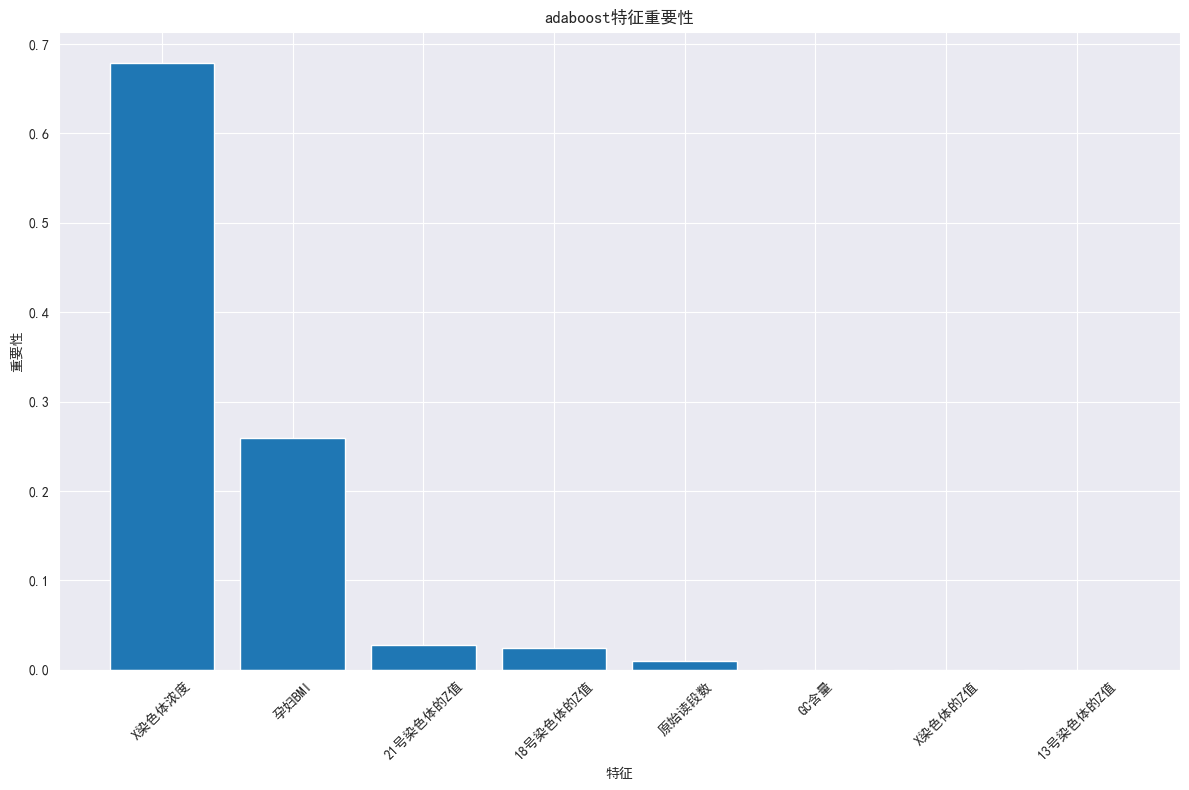


特征重要性排序:
X染色体浓度: 0.6793
孕妇BMI: 0.2592
21号染色体的Z值: 0.0279
18号染色体的Z值: 0.0244
原始读段数: 0.0092
GC含量: 0.0000
X染色体的Z值: 0.0000
13号染色体的Z值: 0.0000
绘制学习曲线...


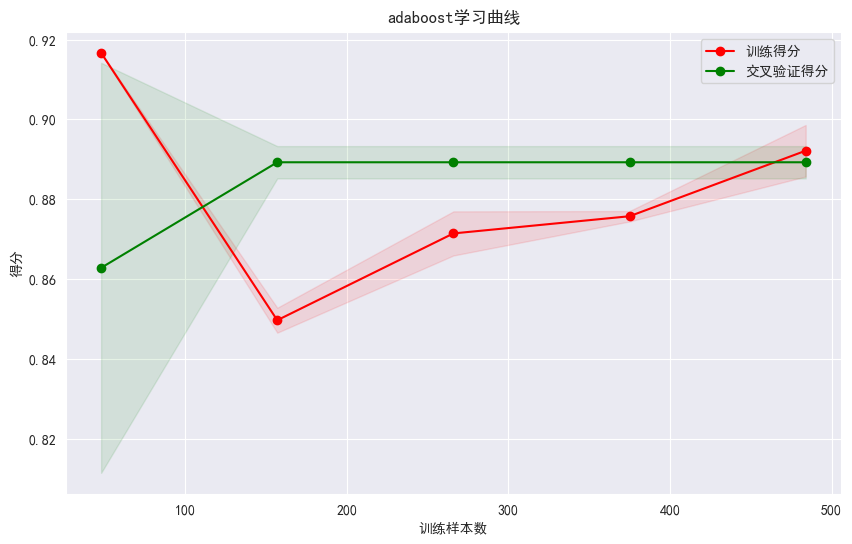

进行参数调优...
最佳参数: {'estimator__max_depth': 2, 'learning_rate': 1.0, 'n_estimators': 50}
最佳分数: 0.241951871657754
评估调优后的模型...

评估指标:
准确率: 0.8843
精确率: 0.3333
召回率: 0.0769
F1分数: 0.1250
AUC分数: 0.7593

分类报告:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       108
           1       0.33      0.08      0.12        13

    accuracy                           0.88       121
   macro avg       0.62      0.53      0.53       121
weighted avg       0.84      0.88      0.85       121



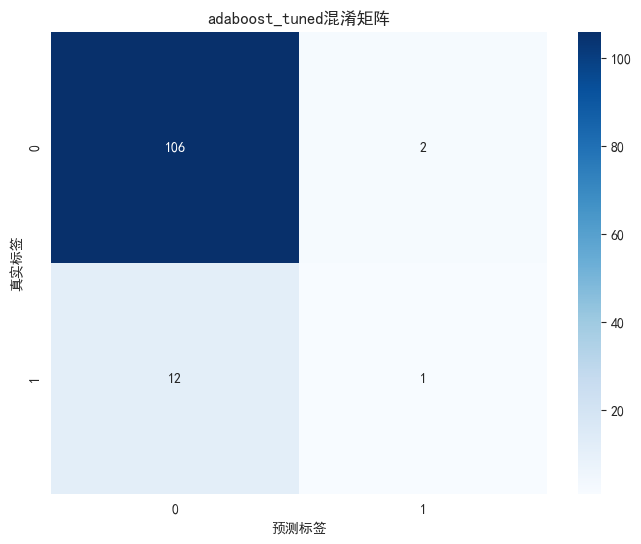

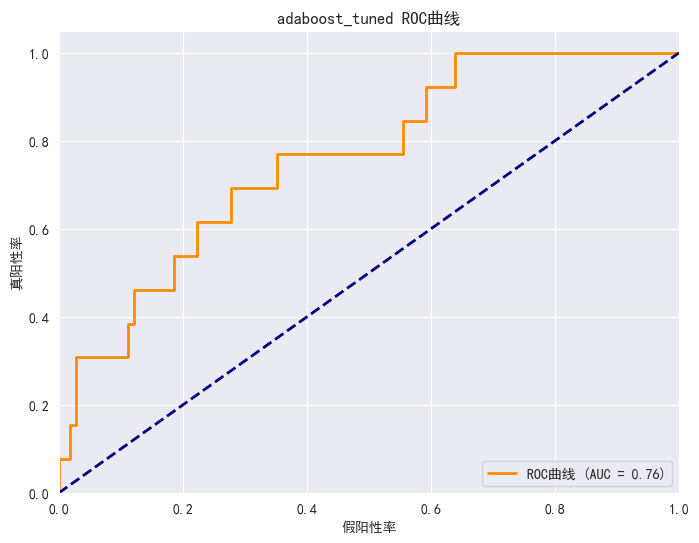

分析调优后模型的特征重要性...


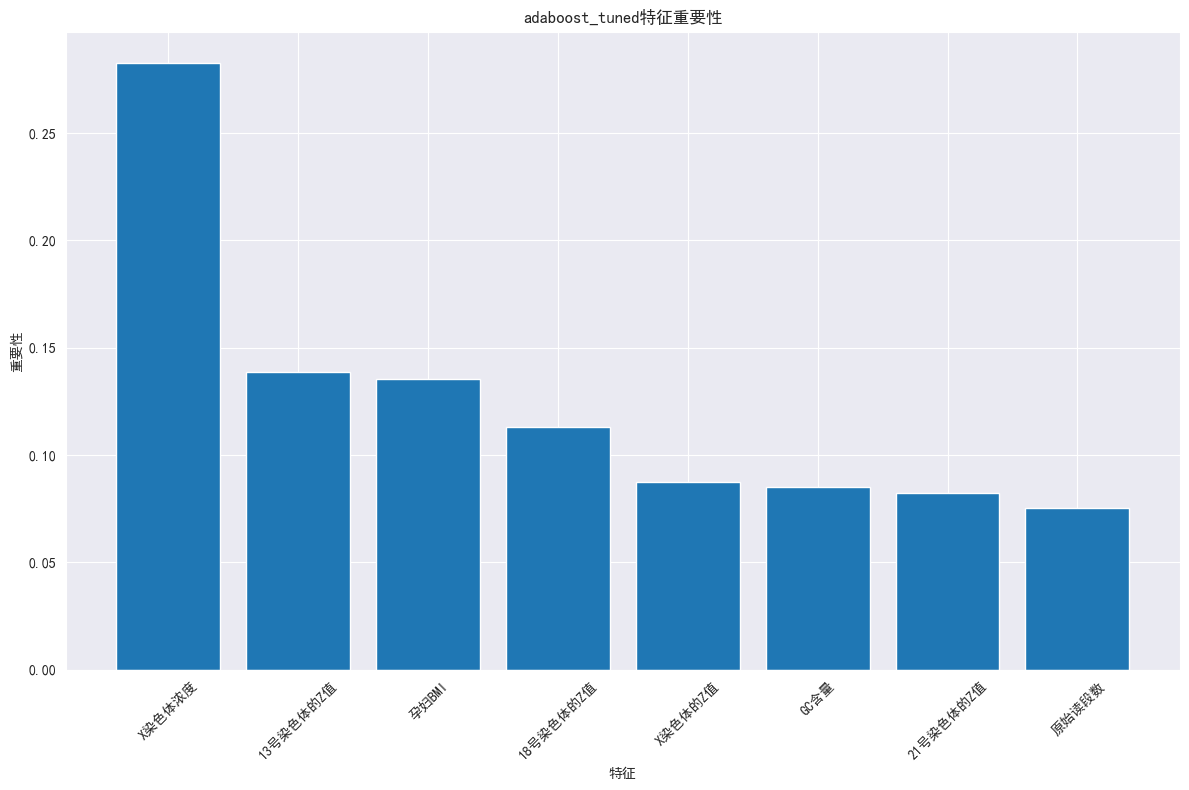


特征重要性排序:
X染色体浓度: 0.2827
13号染色体的Z值: 0.1389
孕妇BMI: 0.1353
18号染色体的Z值: 0.1129
X染色体的Z值: 0.0876
GC含量: 0.0853
21号染色体的Z值: 0.0821
原始读段数: 0.0752
绘制调优后模型的学习曲线...


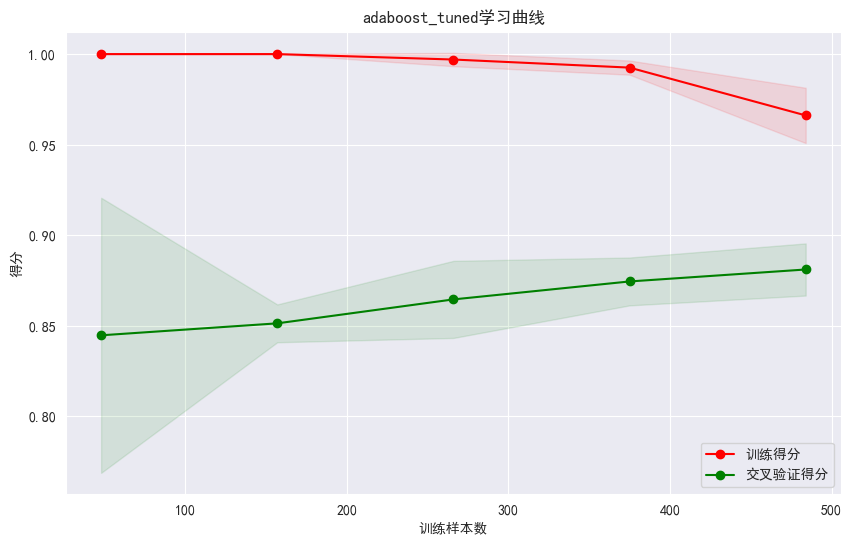

所有图表已保存至当前目录中！


In [66]:
"""
AdaBoost分类器实现
用于染色体数据分类任务
"""
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os  # 添加os模块用于创建目录
from sklearn.model_selection import learning_curve

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 1. 数据加载和预处理
def load_and_preprocess_data(filename='train.csv'):
    """
    加载和预处理数据

    参数:
        filename: 数据文件路径

    返回:
        X_scaled: 标准化后的特征数据
        y: 标签数据
        scaler: 标准化器对象
        feature_names: 特征名称列表
    """
    # 读取CSV数据
    df = pd.read_csv(filename, encoding='gbk')

    # 检查缺失值
    print("缺失值统计:\n", df.isnull().sum())
    print(f"\n数据集形状: {df.shape}")

    # 分离特征和标签
    X = df.iloc[:, :-1]  # 所有列的最后前8列是特征
    y = df.iloc[:, -1]   # 最后一列是标签

    # 特征标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler, X.columns.tolist()

# 2. 数据分析与可视化
def explore_data(X, y, feature_names):
    """
    数据探索和可视化分析

    参数:
        X: 特征数据
        y: 标签数据
        feature_names: 特征名称列表

    返回:
        feature_df: 包含特征和标签的数据框
    """
    # 创建plots目录如果不存在
    if not os.path.exists('plots'):
        os.makedirs('plots')

    # 类别分布可视化
    plt.figure(figsize=(8, 6))
    class_counts = pd.Series(y).value_counts()
    sns.barplot(x=class_counts.index, y=class_counts.values)
    plt.title('标签分布')
    plt.xlabel('标签')
    plt.ylabel('计数')
    plt.savefig('solve_4_adaboost_标签分布.png', dpi=600, bbox_inches='tight')
    plt.show()

    # 特征相关性矩阵
    feature_df = pd.DataFrame(X, columns=feature_names)
    feature_df['Label'] = y
    plt.figure(figsize=(12, 10))
    sns.heatmap(feature_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('特征相关性矩阵')
    plt.savefig('solve_4_adaboost_特性相关性矩阵.png', dpi=600, bbox_inches='tight')
    plt.show()

    return feature_df

# 3. AdaBoost模型训练
def train_adaboost(X_train, y_train):
    """
    训练AdaBoost分类器

    参数:
        X_train: 训练特征数据
        y_train: 训练标签数据

    返回:
        ada_model: 训练好的AdaBoost模型
    """
    # 创建基分类器（决策树桩）
    base_estimator = DecisionTreeClassifier(
        max_depth=1,  # 决策树最大深度为1，形成树桩[3,5]
        random_state=42
    )

    # 创建AdaBoost分类器[3,7]
    ada_model = AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=100,  # 弱分类器数量[4]
        learning_rate=0.1,  # 学习率[4]
        random_state=42
    )

    # 训练模型
    ada_model.fit(X_train, y_train)

    return ada_model

# 4. 模型评估
def evaluate_model(model, X_test, y_test, model_name='ada_model'):
    """
    评估模型性能

    参数:
        model: 训练好的模型
        X_test: 测试特征数据
        y_test: 测试标签数据
        model_name: 模型名称（用于保存图表）

    返回:
        y_pred: 预测标签
        y_pred_proba: 预测概率
    """
    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # 计算评估指标
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print("\n评估指标:")
    print(f"准确率: {acc:.4f}")
    print(f"精确率: {prec:.4f}")
    print(f"召回率: {rec:.4f}")
    print(f"F1分数: {f1:.4f}")
    print(f"AUC分数: {roc_auc:.4f}")
    print("\n分类报告:\n", classification_report(y_test, y_pred))

    # 混淆矩阵可视化
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name}混淆矩阵')
    plt.xlabel('预测标签')
    plt.ylabel('真实标签')
    plt.savefig(f'solve_4_{model_name}_混淆矩阵.png', dpi=600, bbox_inches='tight')
    plt.show()

    # ROC曲线
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC曲线 (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('假阳性率')
    plt.ylabel('真阳性率')
    plt.title(f'{model_name} ROC曲线')
    plt.legend(loc="lower right")
    plt.savefig(f'solve_4_{model_name}_ROC曲线.png', dpi=600, bbox_inches='tight')
    plt.show()

    return y_pred, y_pred_proba

# 5. 特征重要性分析
def plot_feature_importance(model, feature_names, model_name='ada_model'):
    """
    绘制特征重要性图

    参数:
        model: 训练好的AdaBoost模型
        feature_names: 特征名称列表
        model_name: 模型名称（用于保存图表）
    """
    # 获取特征重要性
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # 创建图表
    plt.figure(figsize=(12, 8))
    plt.title(f"{model_name}特征重要性")
    plt.bar(range(len(feature_names)), importances[indices], align="center")
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45)
    plt.xlabel('特征')
    plt.ylabel('重要性')
    plt.tight_layout()
    plt.savefig(f'solve_4_{model_name}_特征重要性.png', dpi=600, bbox_inches='tight')
    plt.show()

    # 打印重要性值
    print("\n特征重要性排序:")
    for i in indices:
        print(f"{feature_names[i]}: {importances[i]:.4f}")

# 6. 学习曲线可视化
def plot_learning_curve(model, X, y, cv=5, model_name='ada_model'):
    """
    绘制学习曲线，评估模型性能随训练样本数量的变化[7](@ref)

    参数:
        model: 机器学习模型
        X: 特征数据
        y: 标签数据
        cv: 交叉验证折数
        model_name: 模型名称（用于保存图表）
    """

    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='训练得分')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='交叉验证得分')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
    plt.xlabel('训练样本数')
    plt.ylabel('得分')
    plt.title(f'{model_name}学习曲线')
    plt.legend(loc='best')
    plt.grid(True)
    plt.savefig(f'solve_4_{model_name}_学习曲线.png', dpi=600, bbox_inches='tight')
    plt.show()

# 7. 模型参数调优
def tune_adaboost(X_train, y_train):
    """
    使用网格搜索优化AdaBoost参数[7](@ref)

    参数:
        X_train: 训练特征数据
        y_train: 训练标签数据

    返回:
        best_model: 调优后的最佳模型
    """
    # 创建基分类器
    base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

    # 定义参数网格
    param_grid = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.5, 1.0],
        'estimator__max_depth': [1, 2]
    }

    # 创建AdaBoost分类器
    ada = AdaBoostClassifier(
        estimator=base_estimator,
        random_state=42
    )

    # 网格搜索
    grid_search = GridSearchCV(
        estimator=ada,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        scoring='f1'
    )

    grid_search.fit(X_train, y_train)

    print("最佳参数:", grid_search.best_params_)
    print("最佳分数:", grid_search.best_score_)

    return grid_search.best_estimator_


# 主流程
if __name__ == "__main__":
    # 1. 数据加载与预处理
    print("正在加载和预处理数据...")
    X, y, scaler, feature_names = load_and_preprocess_data()

    # 2. 数据探索
    print("正在进行数据探索...")
    feature_df = explore_data(X, y, feature_names)

    # 3. 划分训练测试集
    print("划分训练集和测试集...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 4. 训练AdaBoost模型
    print("训练AdaBoost模型...")
    ada_model = train_adaboost(X_train, y_train)

    # 5. 评估模型
    print("评估模型性能...")
    y_pred, y_pred_proba = evaluate_model(ada_model, X_test, y_test, 'adaboost')

    # 6. 特征重要性分析
    print("分析特征重要性...")
    plot_feature_importance(ada_model, feature_names, 'adaboost')

    # 7. 绘制学习曲线
    print("绘制学习曲线...")
    plot_learning_curve(ada_model, X, y, 5, 'adaboost')

    # 8. 参数调优
    print("进行参数调优...")
    tuned_model = tune_adaboost(X_train, y_train)

    # 评估调优后的模型
    print("评估调优后的模型...")
    y_pred_tuned, y_pred_proba_tuned = evaluate_model(tuned_model, X_test, y_test, 'adaboost_tuned')

    # 9. 绘制调优后模型的特征重要性和学习曲线
    print("分析调优后模型的特征重要性...")
    plot_feature_importance(tuned_model, feature_names, 'adaboost_tuned')

    print("绘制调优后模型的学习曲线...")
    plot_learning_curve(tuned_model, X, y, 5, 'adaboost_tuned')

    print("所有图表已保存至当前目录中！")



正在加载和预处理数据...
缺失值统计:
 13号染色体的Z值    0
18号染色体的Z值    0
21号染色体的Z值    0
X染色体的Z值      0
X染色体浓度       0
GC含量         0
原始读段数        0
孕妇BMI        0
标签           0
dtype: int64

数据集形状: (605, 9)
正在进行数据探索...


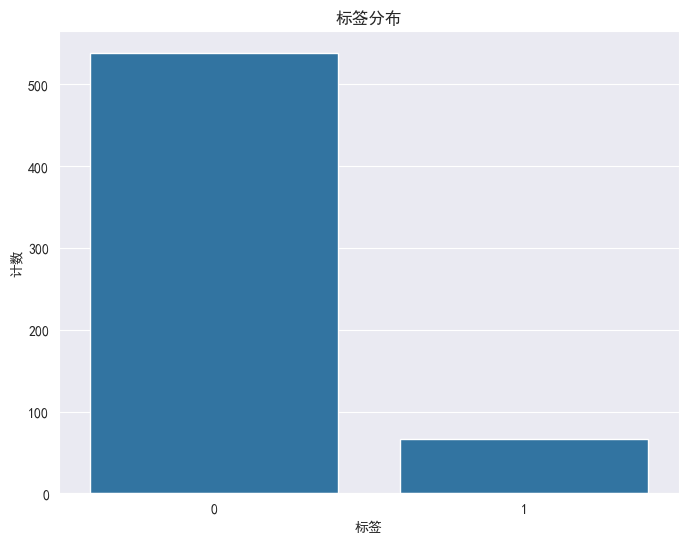

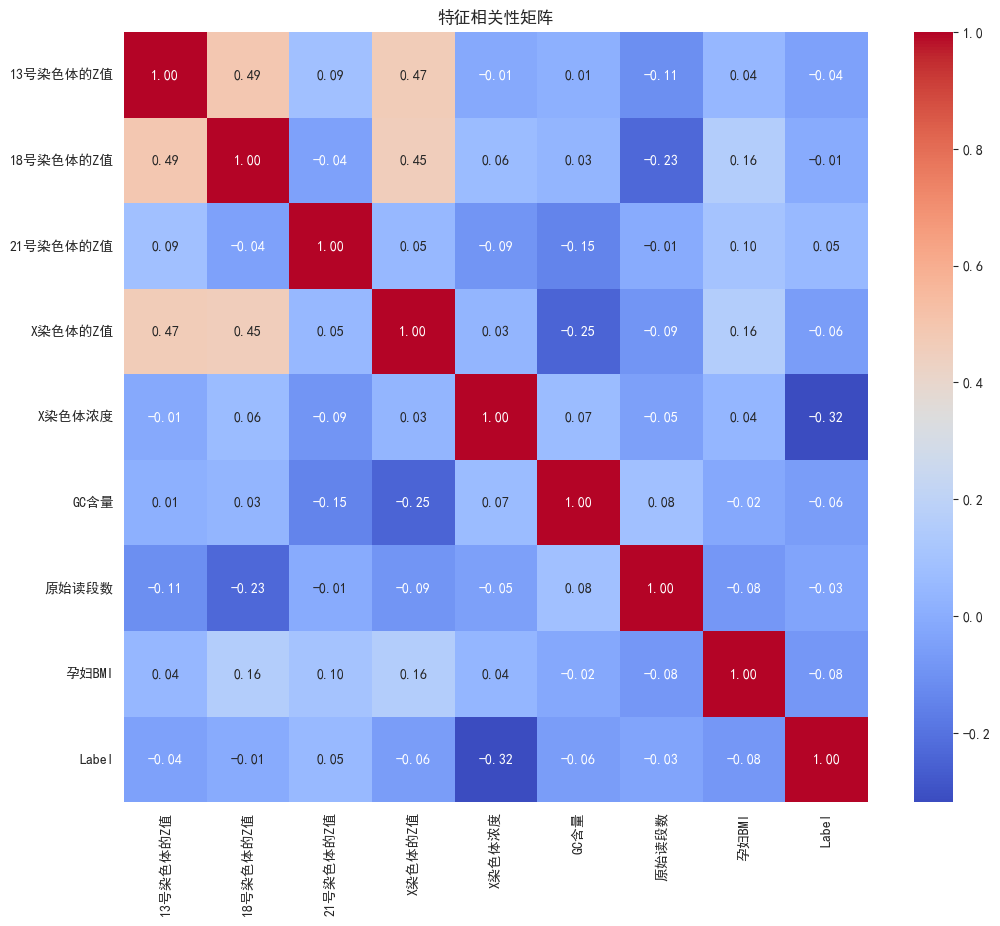

划分训练集和测试集...
训练梯度提升树模型...
评估模型性能...

评估指标:
准确率: 0.9091
精确率: 0.7500
召回率: 0.2308
F1分数: 0.3529
AUC分数: 0.6930

分类报告:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       108
           1       0.75      0.23      0.35        13

    accuracy                           0.91       121
   macro avg       0.83      0.61      0.65       121
weighted avg       0.90      0.91      0.89       121



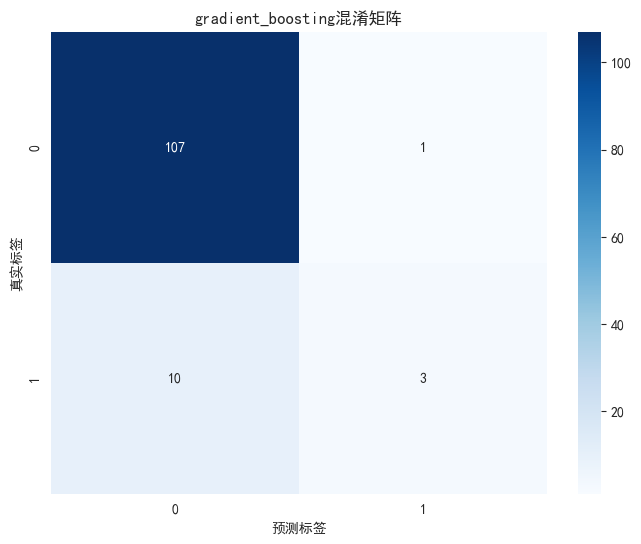

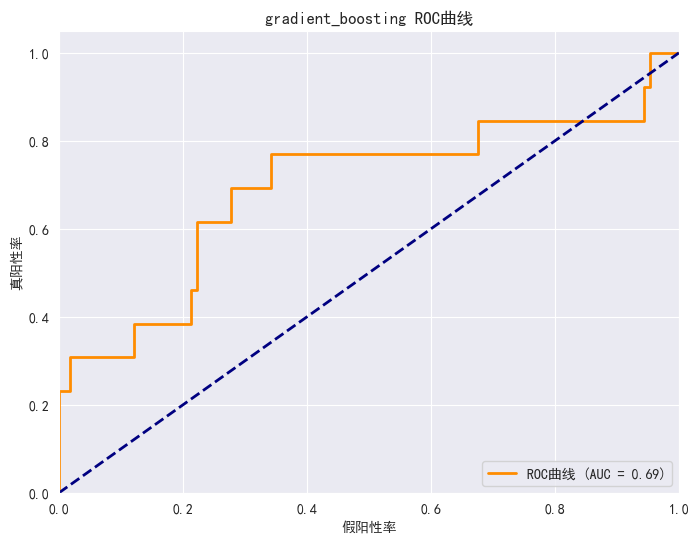

分析特征重要性...


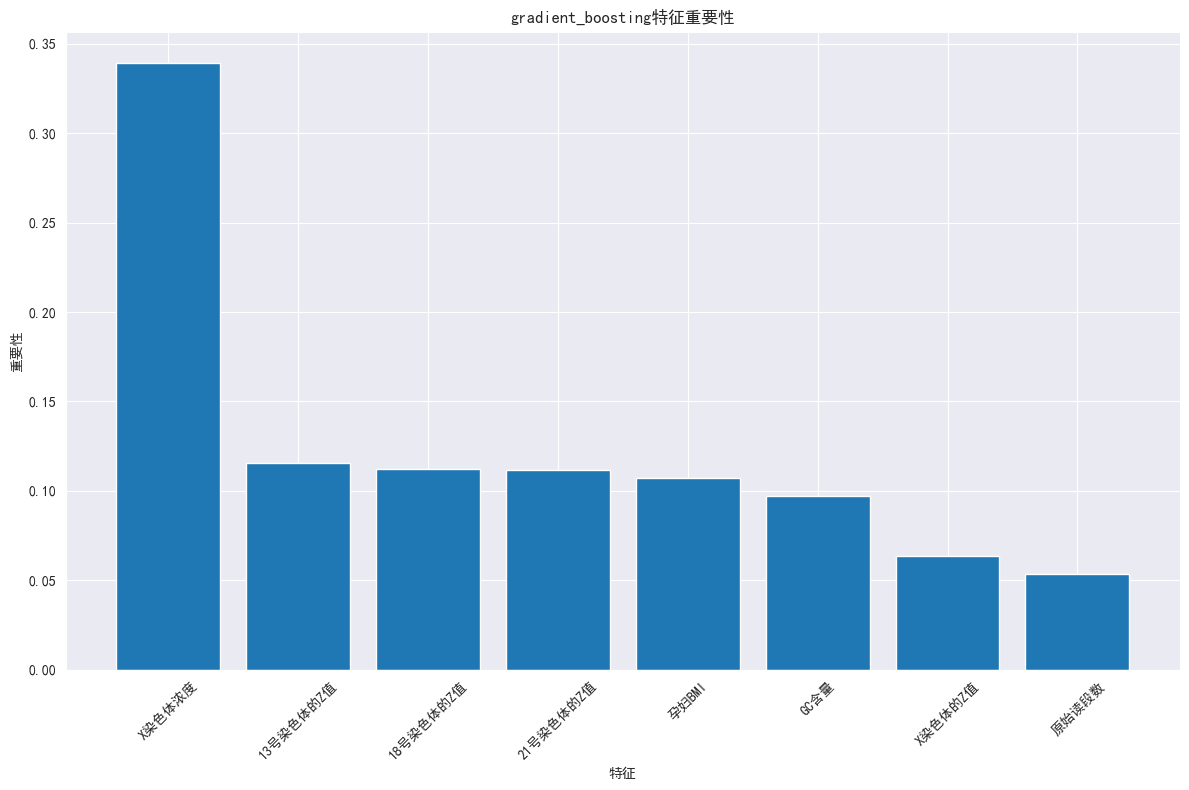


特征重要性排序:
X染色体浓度: 0.3395
13号染色体的Z值: 0.1155
18号染色体的Z值: 0.1125
21号染色体的Z值: 0.1115
孕妇BMI: 0.1070
GC含量: 0.0970
X染色体的Z值: 0.0634
原始读段数: 0.0536
绘制学习曲线...


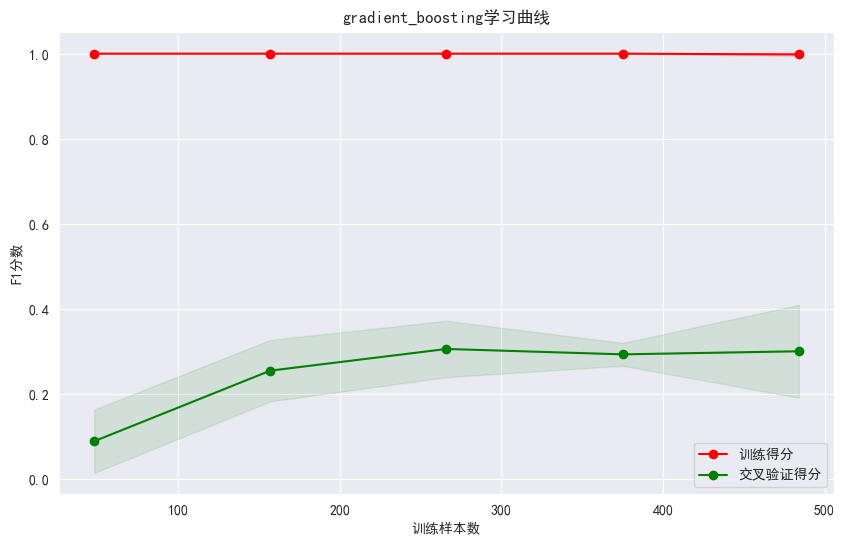

进行参数调优...
最佳参数: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.7}
最佳分数: 0.25252361673414303
评估调优后的模型...

评估指标:
准确率: 0.9091
精确率: 0.7500
召回率: 0.2308
F1分数: 0.3529
AUC分数: 0.6887

分类报告:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       108
           1       0.75      0.23      0.35        13

    accuracy                           0.91       121
   macro avg       0.83      0.61      0.65       121
weighted avg       0.90      0.91      0.89       121



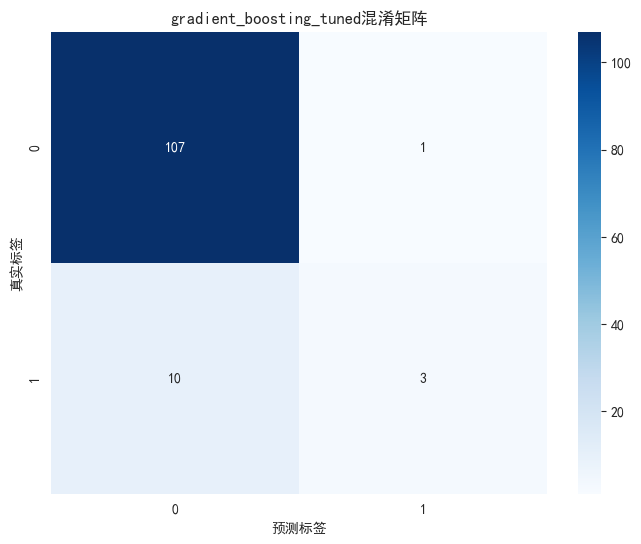

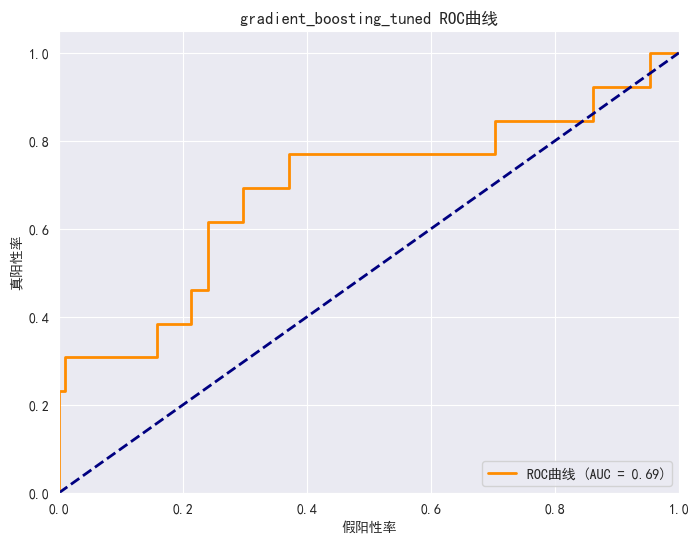

分析调优后模型的特征重要性...


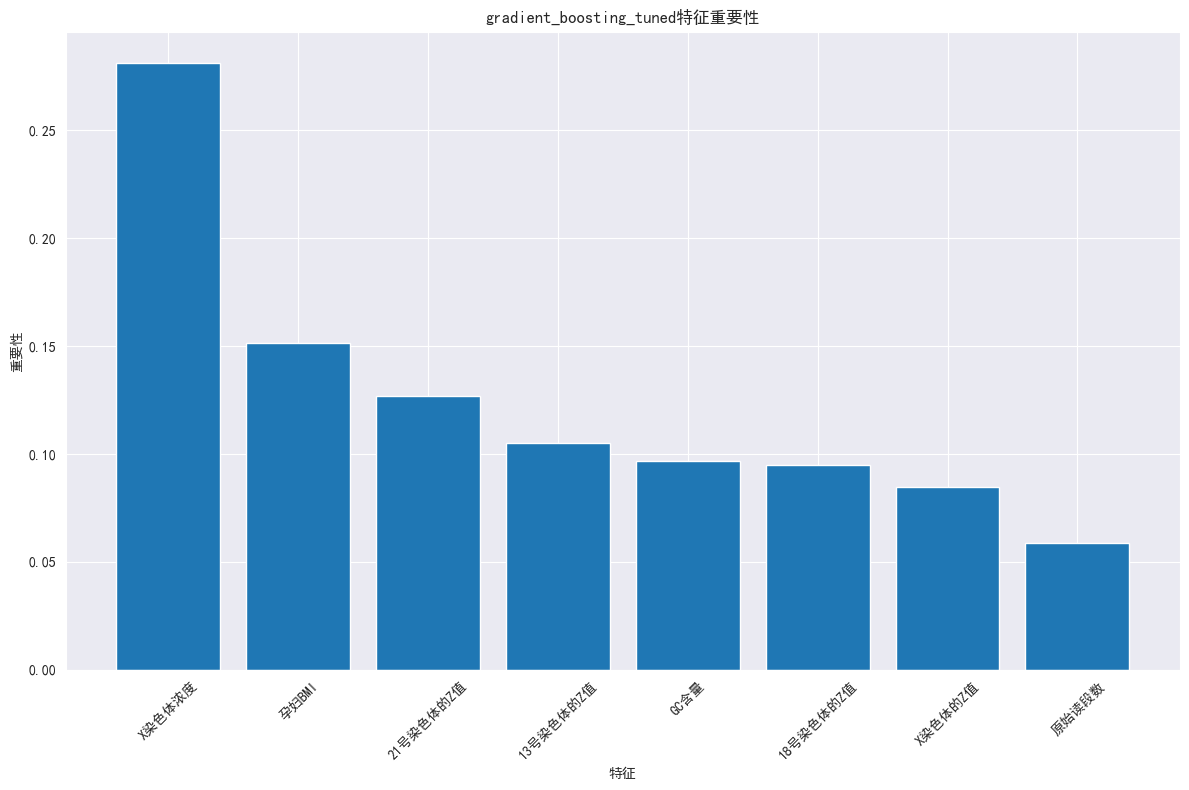


特征重要性排序:
X染色体浓度: 0.2814
孕妇BMI: 0.1516
21号染色体的Z值: 0.1268
13号染色体的Z值: 0.1051
GC含量: 0.0968
18号染色体的Z值: 0.0951
X染色体的Z值: 0.0846
原始读段数: 0.0586
绘制调优后模型的学习曲线...


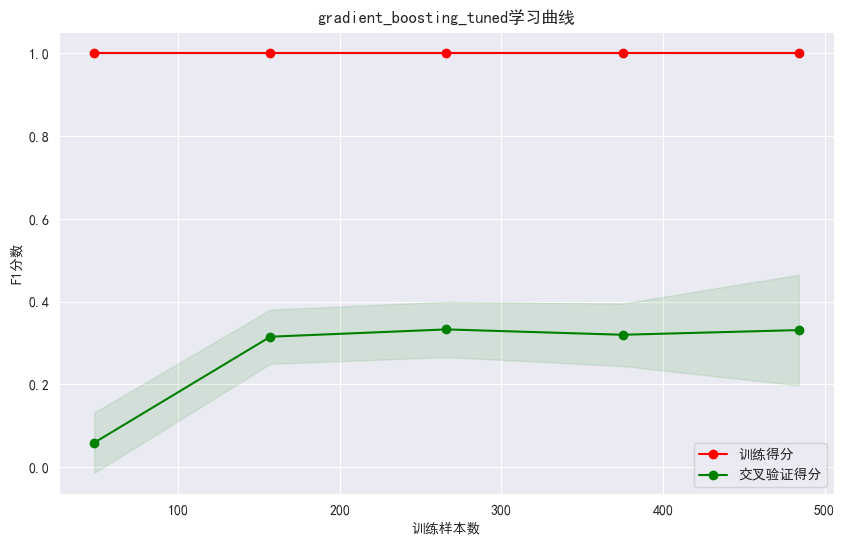

所有图表已保存至当前目录中！


In [62]:
"""
梯度提升树（Gradient Boosting）分类器实现
用于染色体数据分类任务
"""

import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 1. 数据加载和预处理
def load_and_preprocess_data(filename='train.csv'):
    """
    加载和预处理数据

    参数:
        filename: 数据文件路径

    返回:
        X_scaled: 标准化后的特征数据
        y: 标签数据
        scaler: 标准化器对象
        feature_names: 特征名称列表
    """
    # 读取CSV数据
    df = pd.read_csv(filename, encoding='gbk')

    # 检查缺失值
    print("缺失值统计:\n", df.isnull().sum())
    print(f"\n数据集形状: {df.shape}")

    # 分离特征和标签
    X = df.iloc[:, :-1]  # 所有列的最后前8列是特征
    y = df.iloc[:, -1]   # 最后一列是标签

    # 特征标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler, X.columns.tolist()

# 2. 数据分析与可视化
def explore_data(X, y, feature_names):
    """
    数据探索和可视化分析

    参数:
        X: 特征数据
        y: 标签数据
        feature_names: 特征名称列表

    返回:
        feature_df: 包含特征和标签的数据框
    """
    # 创建plots目录如果不存在
    if not os.path.exists('plots'):
        os.makedirs('plots')

    # 类别分布可视化
    plt.figure(figsize=(8, 6))
    class_counts = pd.Series(y).value_counts()
    sns.barplot(x=class_counts.index, y=class_counts.values)
    plt.title('标签分布')
    plt.xlabel('标签')
    plt.ylabel('计数')
    plt.savefig('solve_4_gradient_boosting_标签分布.png', dpi=600, bbox_inches='tight')
    plt.show()

    # 特征相关性矩阵
    feature_df = pd.DataFrame(X, columns=feature_names)
    feature_df['Label'] = y
    plt.figure(figsize=(12, 10))
    sns.heatmap(feature_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('特征相关性矩阵')
    plt.savefig('solve_4_gradient_boosting_特征相关性矩阵.png', dpi=600, bbox_inches='tight')
    plt.show()

    return feature_df

# 3. 梯度提升树模型训练
def train_gradient_boosting(X_train, y_train):
    """
    训练梯度提升树分类器

    参数:
        X_train: 训练特征数据
        y_train: 训练标签数据

    返回:
        gb_model: 训练好的梯度提升树模型
    """
    # 创建梯度提升树分类器
    gb_model = GradientBoostingClassifier(
        n_estimators=150,       # 弱学习器数量[3,6]
        learning_rate=0.1,      # 学习率[6,7]
        max_depth=3,            # 树的最大深度[6,8]
        min_samples_split=4,    # 节点分裂的最小样本数[7]
        subsample=0.8,          # 子采样比例[7]
        random_state=42
    )

    # 训练模型
    gb_model.fit(X_train, y_train)

    return gb_model

# 4. 模型评估
def evaluate_model(model, X_test, y_test, model_name='gb_model'):
    """
    评估模型性能

    参数:
        model: 训练好的模型
        X_test: 测试特征数据
        y_test: 测试标签数据
        model_name: 模型名称（用于保存图表）

    返回:
        y_pred: 预测标签
        y_pred_proba: 预测概率
    """
    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # 计算评估指标
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print("\n评估指标:")
    print(f"准确率: {acc:.4f}")
    print(f"精确率: {prec:.4f}")
    print(f"召回率: {rec:.4f}")
    print(f"F1分数: {f1:.4f}")
    print(f"AUC分数: {roc_auc:.4f}")
    print("\n分类报告:\n", classification_report(y_test, y_pred))

    # 混淆矩阵可视化
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name}混淆矩阵')
    plt.xlabel('预测标签')
    plt.ylabel('真实标签')
    plt.savefig(f'solve_4_{model_name}_混淆矩阵.png', dpi=600, bbox_inches='tight')
    plt.show()

    # ROC曲线
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC曲线 (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('假阳性率')
    plt.ylabel('真阳性率')
    plt.title(f'{model_name} ROC曲线')
    plt.legend(loc="lower right")
    plt.savefig(f'solve_4_{model_name}_ROC曲线.png', dpi=600, bbox_inches='tight')
    plt.show()

    return y_pred, y_pred_proba

# 5. 特征重要性分析
def plot_feature_importance(model, feature_names, model_name='gb_model'):
    """
    绘制特征重要性图

    参数:
        model: 训练好的梯度提升树模型
        feature_names: 特征名称列表
        model_name: 极型名称（用于保存图表）
    """
    # 获取特征重要性
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # 创建图表
    plt.figure(figsize=(12, 8))
    plt.title(f"{model_name}特征重要性")
    plt.bar(range(len(feature_names)), importances[indices], align="center")
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45)
    plt.xlabel('特征')
    plt.ylabel('重要性')
    plt.tight_layout()
    plt.savefig(f'plots/{model_name}_feature_importance.png', dpi=600, bbox_inches='tight')
    plt.show()

    # 打印重要性值
    print("\n特征重要性排序:")
    for i in indices:
        print(f"{feature_names[i]}: {importances[i]:.4f}")

# 6. 学习曲线可视化
def plot_learning_curve(model, X, y, cv=5, model_name='gb_model'):
    """
    绘制学习曲线，评估模型性能随训练样本数量的变化

    参数:
        model: 机器学习模型
        X: 特征数据
        y: 标签数据
        cv: 交叉验证折数
        model_name: 模型名称（用于保存图表）
    """
    from sklearn.model_selection import learning_curve

    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5),
        scoring='f1'
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean =np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='训练得分')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='交叉验证得分')
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color='g')
    plt.xlabel('训练样本数')
    plt.ylabel('F1分数')
    plt.title(f'{model_name}学习曲线')
    plt.legend(loc='best')
    plt.grid(True)
    plt.savefig(f'solve_4_{model_name}_学习曲线.png', dpi=600, bbox_inches='tight')
    plt.show()

# 7. 模型参数调优
def tune_gradient_boosting(X_train, y_train):
    """
    使用网格搜索优化梯度提升树参数[6](@ref)

    参数:
        X_train: 训练特征数据
        y_train: 训练标签数据

    返回:
        best_model: 调优后的最佳模型
    """
    # 定义参数网格
    param_grid = {
        'n_estimators': [100, 150, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.7, 0.8, 0.9]
    }

    # 创建梯度提升树分类器
    gb = GradientBoostingClassifier(random_state=42)

    # 网格搜索
    grid_search = GridSearchCV(
        estimator=gb,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        scoring='f1'
    )

    grid_search.fit(X_train, y_train)

    print("最佳参数:", grid_search.best_params_)
    print("最佳分数:", grid_search.best_score_)

    return grid_search.best_estimator_

# 8. 保存模型函数
def save_model(model, scaler, filename='gradient_boosting_model.joblib'):
    """保存训练好的模型和标准化器"""
    model_data = {
        'model': model,
        'scaler': scaler
    }
    joblib.dump(model_data, filename)
    print(f"模型已保存至 {filename}")

# 主流程
if __name__ == "__main__":
    # 1. 数据加载与预处理
    print("正在加载和预处理数据...")
    X, y, scaler, feature_names = load_and_preprocess_data()

    # 2. 数据探索
    print("正在进行数据探索...")
    feature_df = explore_data(X, y, feature_names)

    # 3. 划分训练测试极
    print("划分训练集和测试集...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 4. 训练梯度提升树模型
    print("训练梯度提升树模型...")
    gb_model = train_gradient_boosting(X_train, y_train)

    # 5. 评估模型
    print("评估模型性能...")
    y_pred, y_pred_proba = evaluate_model(gb_model, X_test, y_test, 'gradient_boosting')

    # 6. 特征重要性分析
    print("分析特征重要性...")
    plot_feature_importance(gb_model, feature_names, 'gradient_boosting')

    # 7. 绘制学习曲线
    print("绘制学习曲线...")
    plot_learning_curve(gb_model, X, y, 5, 'gradient_boosting')

    # 8. 参数调优
    print("进行参数调优...")
    tuned_model = tune_gradient_boosting(X_train, y_train)

    # 评估调优后的模型
    print("评估调优后的模型...")
    y_pred_tuned, y_pred_proba_tuned = evaluate_model(tuned_model, X_test, y_test, 'gradient_boosting_tuned')

    # 9. 绘制调优后模型的特征重要性和学习曲线
    print("分析调优后模型的特征重要性...")
    plot_feature_importance(tuned_model, feature_names, 'gradient_boosting_tuned')

    print("绘制调优后模型的学习曲线...")
    plot_learning_curve(tuned_model, X, y, 5, 'gradient_boosting_tuned')

    print("所有图表已保存至当前目录中！")
